In [38]:
import pandas as pd
import numpy as np
import seaborn as sns
import eli5
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_fscore_support,roc_curve,auc
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.decomposition import PCA
from xgboost import XGBClassifier
from xgboost import plot_importance
from lightgbm import LGBMClassifier
from pystacknet.pystacknet import StackNetClassifier
from matplotlib import pyplot as plt
from imblearn.over_sampling import SMOTENC
from imblearn.combine import SMOTETomek
from eli5.sklearn import PermutationImportance
from statsmodels.stats.outliers_influence import variance_inflation_factor
%matplotlib inline

In [39]:
LR_grid={'penalty': ['l1','l2'], 
            'C': [0.001, 0.01, 0.1, 1, 10, 100],
               'random_state': [25]  }

RF_grid={'max_depth': [4,6,8,10,12,14], # max_depth: The maximum depth of the tree.
              'n_estimators': [100,200,400,600], # n_estimators: The number of trees in the forest.
              'min_samples_split': [50, 100,25,75,125],
         'random_state': [25]
              }

XGB_grid={'n_estimators' : [200,400,600],
              'learning_rate' : [0.01,0.05,0.10,0.15],
              'max_depth' : [4,6,8,10,12],
         'random_state': [25]} 

SVM_grid = {'gamma': [0.01, 0.1, 1, 10, 100], 
              'C': [0.01, 0.1, 1, 10, 100],
           'random_state': [25]}

LR = LogisticRegression()
RF = RandomForestClassifier()
XGB = XGBClassifier()
SVM = SVC()

gridlist = [LR_grid,RF_grid,XGB_grid,SVM_grid]
classlist = [LR,RF,XGB,SVM]

In [40]:
def gridsearch(gridlist,classlist,train_x, train_y):
    for i in range(4):
        grid = GridSearchCV(classlist[i], gridlist[i], scoring = 'roc_auc', cv=5,n_jobs=-1)  
        grid.fit(train_x, train_y)
        print(grid.best_params_)
        print(grid.best_score_)
        classlist[i] = grid.best_estimator_
    return classlist

In [41]:
data = pd.read_excel('C:/Users/Administrator/Desktop/deep/data/fracturefeature.xlsx')
data
data_y = data['isFracture']
data_x = data.drop('isFracture', 1) #normal

In [54]:
vif = pd.DataFrame()
vif["features"] = data_x.columns
vif["VIF Factor"] = [variance_inflation_factor(data_x.values, i) for i in range(data_x.shape[1])]
vif_remove = vif.sort_values(ascending=False,by='VIF Factor')[:]
vif_remove

D:\roadroad\envs\sungkyun\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,features,VIF Factor
27,original_glcm_SumAverage,inf
9,original_glcm_ClusterTendency,inf
22,original_glcm_JointAverage,inf
10,original_glcm_Contrast,inf
29,original_glcm_SumSquares,inf
...,...,...
2,original_firstorder_Skewness,248.805907
8,original_glcm_ClusterShade,149.256774
25,original_glcm_MCC,124.005432
66,original_glszm_LargeAreaLowGrayLevelEmphasis,44.991070


In [55]:
DFP = StandardScaler().fit_transform(data_x)
data_x = pd.DataFrame(DFP,columns=data_x.columns)

In [56]:
vif = pd.DataFrame()
vif["features"] = data_x.columns
vif["VIF Factor"] = [variance_inflation_factor(data_x.values, i) for i in range(data_x.shape[1])]
vif_remove = vif.sort_values(ascending=False,by='VIF Factor')[:]
vif_remove

D:\roadroad\envs\sungkyun\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,features,VIF Factor
27,original_glcm_SumAverage,inf
9,original_glcm_ClusterTendency,inf
22,original_glcm_JointAverage,inf
10,original_glcm_Contrast,inf
29,original_glcm_SumSquares,inf
...,...,...
2,original_firstorder_Skewness,248.805907
8,original_glcm_ClusterShade,149.256774
25,original_glcm_MCC,124.005432
66,original_glszm_LargeAreaLowGrayLevelEmphasis,44.991070


In [7]:
rand = 25
train_x,test_x,train_y,test_y = train_test_split(data_x,data_y,test_size=0.3,random_state = rand)

In [8]:
classlist = gridsearch(gridlist,classlist,train_x, train_y)

D:\roadroad\envs\sungkyun\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


{'C': 100, 'penalty': 'l2', 'random_state': 25}
0.87144
{'max_depth': 10, 'min_samples_split': 25, 'n_estimators': 600, 'random_state': 25}
0.8918666666666667
{'learning_rate': 0.15, 'max_depth': 12, 'n_estimators': 400, 'random_state': 25}
0.9532133333333332
{'C': 1, 'gamma': 1, 'random_state': 25}
0.96312


In [83]:
def create_curve(classlist,train_x,train_y,test_x,test_y):
    LR = classlist[0]
    RF = classlist[1]
    XGB = classlist[2]
    SVM = classlist[3]

    LR.fit(train_x,train_y)
    RF.fit(train_x,train_y)
    XGB.fit(train_x,train_y)
    SVM.fit(train_x,train_y)

    lr_proba = LR.predict_proba(test_x)[:,1]
    rf_proba = RF.predict_proba(test_x)[:,1]
    xgb_proba = XGB.predict_proba(test_x)[:,1]
    SVM_proba = SVM.decision_function(test_x)
    lgbm_proba = get_stacking_data(classlist,train_x,train_y,test_x,5)
    print(lr_proba)
    print(type(lr_proba))
    print(rf_proba)
    print(xgb_proba)
    print(SVM_proba)

    fpr_lr,tpr_lr,_=roc_curve(test_y,lr_proba)
    fpr_rf,tpr_rf,_=roc_curve(test_y,rf_proba)
    fpr_xgb,tpr_xgb,_=roc_curve(test_y,xgb_proba)
    fpr_svm,tpr_svm,_ = roc_curve(test_y,SVM_proba)
    fpr_lgbm,tpr_lgbm,_=roc_curve(test_y,lgbm_proba)

    auc_lr=auc(fpr_lr, tpr_lr)
    auc_xgb=auc(fpr_xgb, tpr_xgb)
    auc_rf=auc(fpr_rf, tpr_rf)
    auc_svm=auc(fpr_svm, tpr_svm)
    auc_lgbm=auc(fpr_lgbm, tpr_lgbm)
    
    plt.rcParams["figure.figsize"] = (15,15)
    plt.plot(fpr_lr, tpr_lr, label="LR (AUC= %s)"%(round(auc_lr,3)))
    plt.plot(fpr_rf, tpr_rf, label="RF (AUC= %s)"%(round(auc_rf,3)))
    plt.plot(fpr_xgb, tpr_xgb, label="XGB (AUC= %s)"%(round(auc_xgb,3)))
    plt.plot(fpr_svm, tpr_svm, label="SVM (AUC= %s)"%(round(auc_svm,3)))
    #plt.plot(fpr_lgbm, tpr_lgbm, label="S.ESB (AUC= %s)"%(round(auc_lgbm,3)))
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('1-Specificity',fontsize=25)
    plt.ylabel('Sensitivity',fontsize=25)
    plt.title('Receiver Operating Characteristic', fontsize = 30)
    plt.legend(loc="lower right",fontsize=24)
    plt.show()
    
    Importance = pd.DataFrame(train_x.columns,columns=['feature'])
    suf = ('_LR','_RF','_XGB','_SVM')
    
    for i in range(4):
        PI = P_Importance(classlist[i],test_x,test_y).loc[:,['feature','weight']]
        Importance = pd.merge(Importance,PI,on='feature',suffixes=(suf[i-1],suf[i]))
    
    Importance['meanscore'] = Importance.apply(lambda x: np.mean(x[1:5]),1)
    ftr_top20 = Importance.sort_values(ascending=False,by='meanscore')[:]
    plt.figure(figsize=(15, 30))
    sns.set(font='Times New Roman', font_scale = 3)

    plt.title('Feature importances', fontsize = 24)
    sns.barplot(x=ftr_top20.meanscore , y = ftr_top20.feature)
    plt.show()
    
    return Importance

In [10]:
def get_stacking_data(classlist,train_x,train_y,test_x,n_folds=5):
    #train_x = train_x.as_matrix()
    train_x = train_x.values
    #test_x = test_x.as_matrix()
    test_x = test_x.values
    test_x = test_x.astype(float)
    train_x = train_x.astype(float)
    models=[classlist,
            [LGBMClassifier(n_estimators=400)],
            ]
    stk=StackNetClassifier(models, metric="auc", folds=n_folds,
        restacking=False,use_retraining=True, use_proba=True, 
        random_state=rand,n_jobs=-1, verbose=1)
    stk.fit(train_x,train_y)
    preds=stk.predict_proba(test_x)[:,1]
    return preds

In [11]:
def P_Importance(model,test_x,test_y):
    perm = PermutationImportance(model, scoring = "roc_auc", random_state = rand).fit(test_x, test_y) 
    ftr_importances = eli5.format_as_dataframe(eli5.explain_weights(perm,top=85, feature_names = test_x.columns.tolist()))
    ftr_top = ftr_importances.sort_values(ascending=False,by='feature')[:]
    return ftr_top

D:\roadroad\envs\sungkyun\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


====================== Start of Level 0 ======================
Input Dimensionality 81 at Level 0 
4 models included in Level 0 
Fold 1/5 , model 0 , auc===0.841600 
Fold 1/5 , model 1 , auc===0.912000 
Fold 1/5 , model 2 , auc===0.964800 
Fold 1/5 , model 3 , auc===0.860000 
=========== end of fold 1 in level 0 ===========
Fold 2/5 , model 0 , auc===0.829228 
Fold 2/5 , model 1 , auc===0.850575 
Fold 2/5 , model 2 , auc===0.911330 
Fold 2/5 , model 3 , auc===0.879310 
=========== end of fold 2 in level 0 ===========
Fold 3/5 , model 0 , auc===0.876603 
Fold 3/5 , model 1 , auc===0.907051 
Fold 3/5 , model 2 , auc===0.979167 
Fold 3/5 , model 3 , auc===0.942308 
=========== end of fold 3 in level 0 ===========
Fold 4/5 , model 0 , auc===0.881494 
Fold 4/5 , model 1 , auc===0.896104 
Fold 4/5 , model 2 , auc===0.949675 
Fold 4/5 , model 3 , auc===0.931818 
=========== end of fold 4 in level 0 ===========
Fold 5/5 , model 0 , auc===0.914716 
Fold 5/5 , model 1 , auc===0.891304 
Fold 5/5 

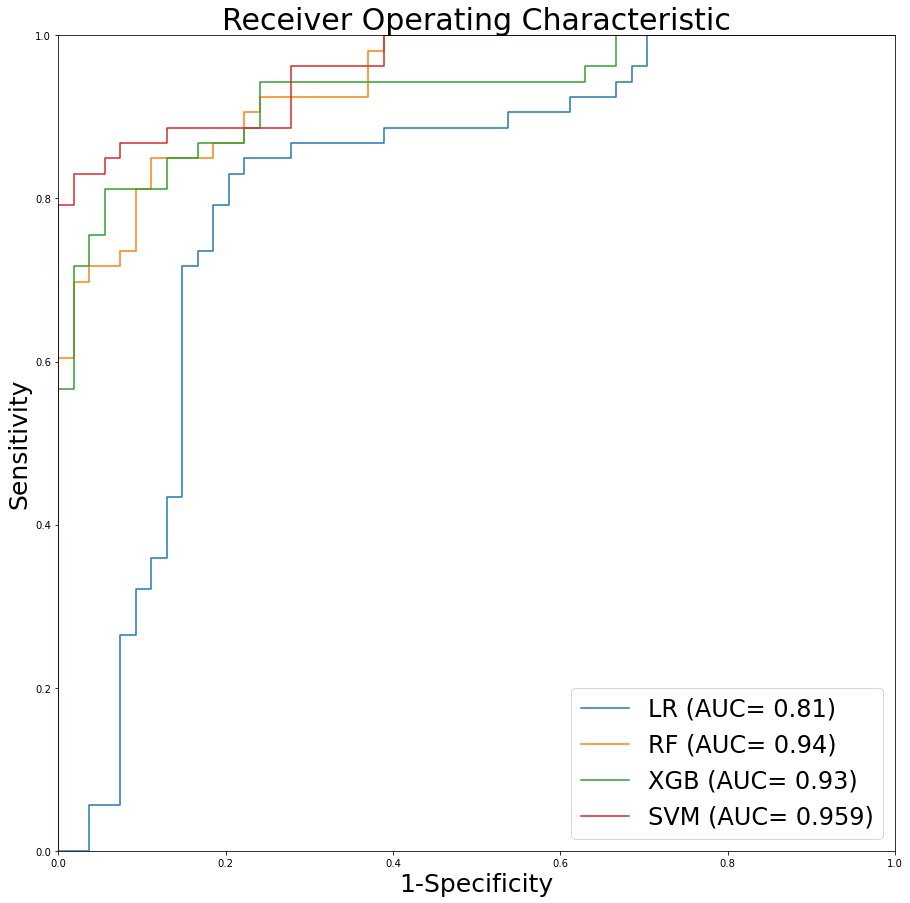

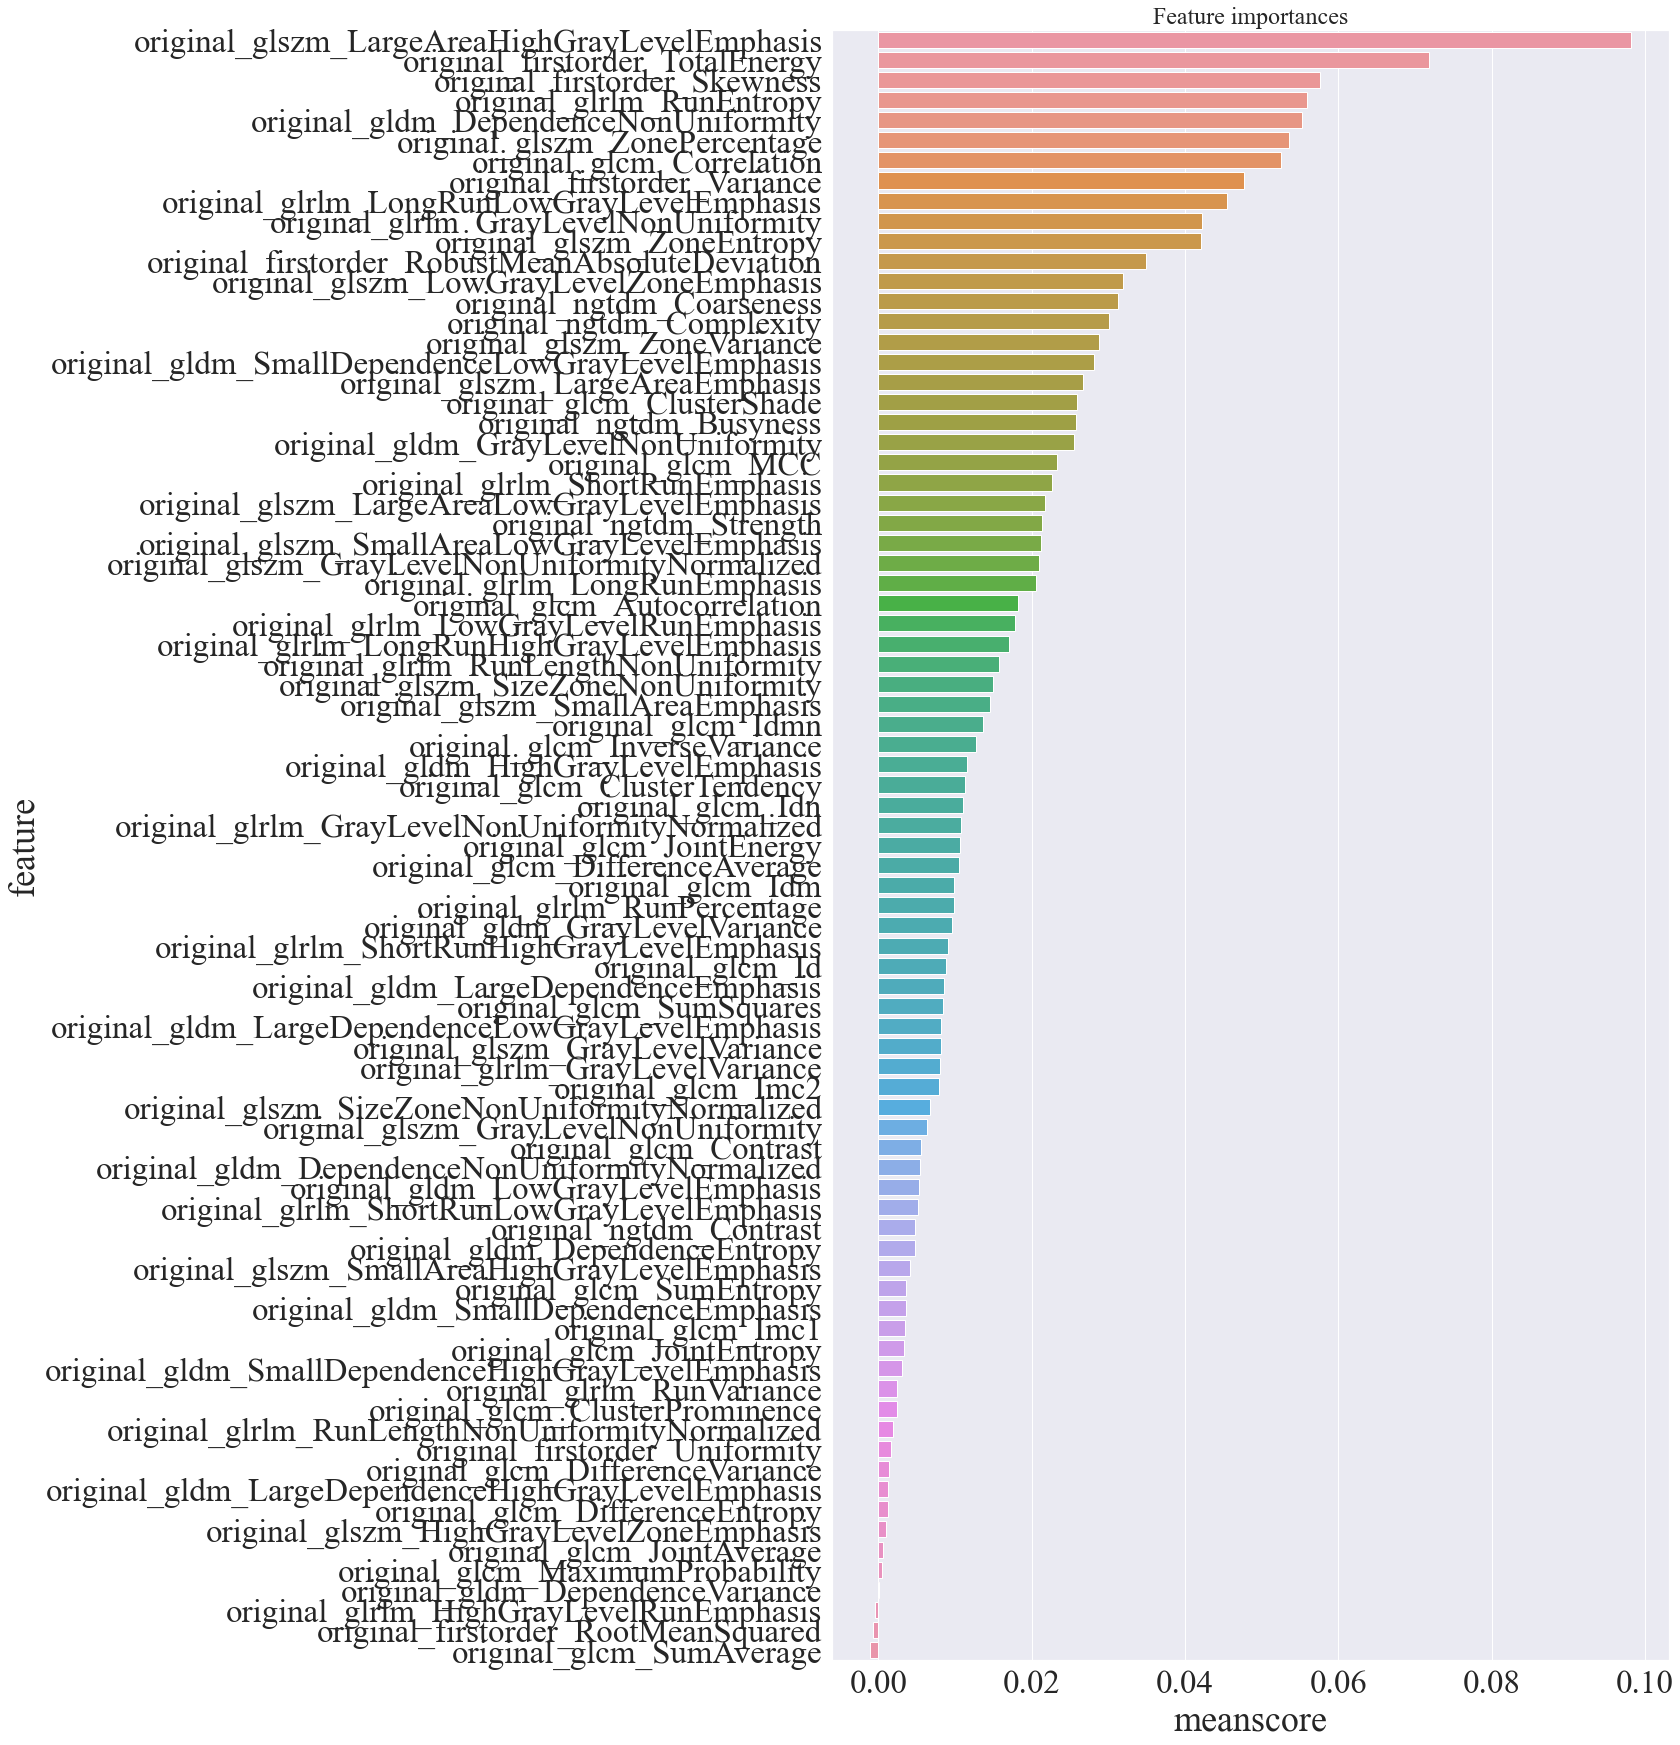

In [12]:
ftr_importances = create_curve(classlist,train_x,train_y,test_x,test_y)

In [13]:
def featurefind(ftr_importances,data_x,data_y,classlist):
    best_score = 0
    for i in range(len(data_x.columns)-1):
        ftr_bot = ftr_importances.sort_values(ascending=True,by='meanscore')[:1]
        data_x = data_x.drop(ftr_bot.feature ,1)
        train_x,test_x,train_y,test_y = train_test_split(data_x,data_y,test_size=0.3,random_state = rand)
        #train_x, train_y = SMOTETomek(random_state=rand).fit_sample(train_x, train_y)
        meanscore,ftr_importances = roc_score(classlist,train_x,train_y,test_x,test_y)
        print(i)
        if meanscore>=best_score:
            best_score = meanscore
            best_bot = data_x
            print("best_score = ",best_score)
            print(best_bot.columns)
    return best_bot

In [14]:
def featurefind2(ftr_importances,data_x,data_y,classlist):
    best_score = 0
    for i in range(40):
        ftr_bot = ftr_importances.sort_values(ascending=True,by='meanscore')[:1]
        data_x = data_x.drop(ftr_bot.feature ,1)
        train_x,test_x,train_y,test_y = train_test_split(data_x,data_y,test_size=0.3,random_state = rand)
        #train_x, train_y = SMOTETomek(random_state=rand).fit_sample(train_x, train_y)
        meanscore,ftr_importances = roc_score(classlist,train_x,train_y,test_x,test_y)
        print(i)
    for i in range(len(data_x.columns)-1):
        ftr_bot = ftr_importances.sort_values(ascending=True,by='meanscore')[:1]
        data_x = data_x.drop(ftr_bot.feature ,1)
        train_x,test_x,train_y,test_y = train_test_split(data_x,data_y,test_size=0.3,random_state = rand)
        #train_x, train_y = SMOTETomek(random_state=rand).fit_sample(train_x, train_y)
        meanscore,ftr_importances = roc_score(classlist,train_x,train_y,test_x,test_y)
        print(i)
        if meanscore>=best_score:
            best_score = meanscore
            best_bot = data_x
            print("best_score = ",best_score)
            print(best_bot.columns)
    return best_bot

In [15]:
def roc_score(classlist,train_x,train_y,test_x,test_y):
    LR = classlist[0]
    RF = classlist[1]
    XGB = classlist[2]
    SVM = classlist[3]
    
    LR.fit(train_x,train_y)
    RF.fit(train_x,train_y)
    XGB.fit(train_x,train_y)
    SVM.fit(train_x,train_y)
    
    lr_proba = LR.predict_proba(test_x)[:,1]
    rf_proba = RF.predict_proba(test_x)[:,1]
    xgb_proba = XGB.predict_proba(test_x)[:,1]
    SVM_proba = SVM.decision_function(test_x)
    
    lr_score = roc_auc_score(test_y, lr_proba)
    rf_score = roc_auc_score(test_y, rf_proba)
    xgb_score = roc_auc_score(test_y, xgb_proba)
    SVM_score = roc_auc_score(test_y, SVM_proba)
    
    print(lr_score,rf_score,xgb_score,SVM_score)
    
    Importance = pd.DataFrame(train_x.columns,columns=['feature'])
    suf = ('_LR','_RF','_XGB','_SVM')
    
    for i in range(4):
        PI = P_Importance(classlist[i],test_x,test_y).loc[:,['feature','weight']]
        Importance = pd.merge(Importance,PI,on='feature',suffixes=(suf[i-1],suf[i]))
    
    Importance['meanscore'] = Importance.apply(lambda x: np.mean(x[1:5]),1)
    
    
    return np.mean([lr_score,rf_score,xgb_score,SVM_score]),Importance

D:\roadroad\envs\sungkyun\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8148148148148148 0.9364081062194269 0.929769392033543 0.9591194968553458
0


D:\roadroad\envs\sungkyun\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8151642208245982 0.9318658280922433 0.93256464011181 0.9608665269042627
1


D:\roadroad\envs\sungkyun\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8127183787561146 0.9367575122292103 0.9308176100628931 0.9629629629629629
2


D:\roadroad\envs\sungkyun\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8088749126484975 0.9350104821802936 0.9224318658280923 0.9636617749825297
3


D:\roadroad\envs\sungkyun\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8127183787561146 0.9371069182389937 0.9339622641509433 0.9640111809923131
4


D:\roadroad\envs\sungkyun\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8137665967854647 0.9329140461215933 0.940251572327044 0.9612159329140461
5


D:\roadroad\envs\sungkyun\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8092243186582808 0.9346610761705101 0.9371069182389937 0.9612159329140461
6


D:\roadroad\envs\sungkyun\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8165618448637317 0.9371069182389936 0.9364081062194269 0.9640111809923131
7


D:\roadroad\envs\sungkyun\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8151642208245982 0.928721174004193 0.9364081062194269 0.9636617749825298
8


D:\roadroad\envs\sungkyun\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8137665967854647 0.9385045422781272 0.93361285814116 0.9636617749825298
9


D:\roadroad\envs\sungkyun\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8137665967854647 0.9360587002096435 0.9255765199161425 0.9640111809923131
10


D:\roadroad\envs\sungkyun\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8088749126484975 0.9388539482879106 0.9255765199161425 0.9640111809923131
11


D:\roadroad\envs\sungkyun\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8137665967854648 0.9374563242487771 0.929769392033543 0.9643605870020965
12


D:\roadroad\envs\sungkyun\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8151642208245982 0.9406009783368274 0.9273235499650594 0.9647099930118799
13


D:\roadroad\envs\sungkyun\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8116701607267646 0.9374563242487771 0.9304682040531098 0.9654088050314465
14


D:\roadroad\envs\sungkyun\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8151642208245982 0.9357092941998602 0.9339622641509434 0.9647099930118799
15


D:\roadroad\envs\sungkyun\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8134171907756813 0.9332634521313766 0.9357092941998603 0.9643605870020966
16


D:\roadroad\envs\sungkyun\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8176100628930818 0.9339622641509433 0.9357092941998602 0.9629629629629629
17


D:\roadroad\envs\sungkyun\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8137665967854647 0.93361285814116 0.935359888190077 0.9619147449336127
18


D:\roadroad\envs\sungkyun\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.815863032844165 0.9346610761705101 0.9447938504542278 0.9622641509433961
19


D:\roadroad\envs\sungkyun\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8162124388539483 0.9367575122292102 0.9444444444444445 0.9615653389238294
20


D:\roadroad\envs\sungkyun\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8060796645702306 0.9308176100628931 0.9406009783368273 0.9626135569531795
21


D:\roadroad\envs\sungkyun\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8092243186582808 0.9357092941998603 0.9367575122292103 0.9626135569531795
22


D:\roadroad\envs\sungkyun\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8078266946191474 0.936408106219427 0.9367575122292103 0.9626135569531795
23


D:\roadroad\envs\sungkyun\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8113207547169811 0.9367575122292103 0.9360587002096437 0.9598183088749126
24


D:\roadroad\envs\sungkyun\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8095737246680643 0.9360587002096435 0.9451432564640112 0.9566736547868624
25


D:\roadroad\envs\sungkyun\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8120195667365478 0.9399021663172606 0.9451432564640112 0.9566736547868624
26


D:\roadroad\envs\sungkyun\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.810272536687631 0.9346610761705102 0.943046820405311 0.9587700908455625
27


D:\roadroad\envs\sungkyun\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8158630328441648 0.9385045422781272 0.9433962264150944 0.9584206848357792
28


D:\roadroad\envs\sungkyun\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8151642208245983 0.9360587002096437 0.9374563242487771 0.9563242487770789
29


D:\roadroad\envs\sungkyun\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8095737246680644 0.9392033542976939 0.9486373165618449 0.9570230607966457
30


D:\roadroad\envs\sungkyun\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8011879804332634 0.9381551362683439 0.9486373165618449 0.9570230607966457
31


D:\roadroad\envs\sungkyun\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8102725366876311 0.9339622641509434 0.9482879105520615 0.9591194968553459
32


D:\roadroad\envs\sungkyun\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.814116002795248 0.9406009783368274 0.9475890985324948 0.9587700908455625
33


D:\roadroad\envs\sungkyun\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8134171907756813 0.9357092941998603 0.9475890985324947 0.9587700908455625
34


D:\roadroad\envs\sungkyun\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8123689727463312 0.9360587002096437 0.9430468204053108 0.9538784067085954
35


D:\roadroad\envs\sungkyun\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8134171907756814 0.9308176100628931 0.944095038434661 0.9538784067085954
36


D:\roadroad\envs\sungkyun\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8127183787561146 0.9350104821802936 0.944095038434661 0.9538784067085954
37


D:\roadroad\envs\sungkyun\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8078266946191475 0.9360587002096437 0.9360587002096437 0.9542278127183788
38


D:\roadroad\envs\sungkyun\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8092243186582809 0.9419986023759608 0.9381551362683438 0.9542278127183788
39


D:\roadroad\envs\sungkyun\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8050314465408805 0.9360587002096437 0.9315164220824598 0.9549266247379455
0
best_score =  0.9068832983927324
Index(['original_firstorder_RobustMeanAbsoluteDeviation',
       'original_firstorder_Skewness', 'original_firstorder_TotalEnergy',
       'original_firstorder_Variance', 'original_glcm_Autocorrelation',
       'original_glcm_ClusterShade', 'original_glcm_ClusterTendency',
       'original_glcm_Correlation', 'original_glcm_DifferenceAverage',
       'original_glcm_Id', 'original_glcm_Idmn', 'original_glcm_Idn',
       'original_glcm_Imc1', 'original_glcm_Imc2', 'original_glcm_JointEnergy',
       'original_glcm_MCC', 'original_glcm_SumSquares',
       'original_gldm_GrayLevelNonUniformity',
       'original_gldm_LargeDependenceLowGrayLevelEmphasis',
       'original_gldm_SmallDependenceLowGrayLevelEmphasis',
       'original_glrlm_GrayLevelNonUniformity',
       'original_glrlm_LongRunEmphasis',
       'original_glrlm_LongRunHighGrayLevelEmphasis',
       'original_glrlm_LongR

D:\roadroad\envs\sungkyun\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8123689727463312 0.9388539482879107 0.9329140461215932 0.9563242487770789
1
best_score =  0.9101153039832285
Index(['original_firstorder_RobustMeanAbsoluteDeviation',
       'original_firstorder_Skewness', 'original_firstorder_TotalEnergy',
       'original_firstorder_Variance', 'original_glcm_Autocorrelation',
       'original_glcm_ClusterShade', 'original_glcm_ClusterTendency',
       'original_glcm_Correlation', 'original_glcm_DifferenceAverage',
       'original_glcm_Id', 'original_glcm_Idmn', 'original_glcm_Idn',
       'original_glcm_Imc1', 'original_glcm_Imc2', 'original_glcm_JointEnergy',
       'original_glcm_MCC', 'original_glcm_SumSquares',
       'original_gldm_GrayLevelNonUniformity',
       'original_gldm_LargeDependenceLowGrayLevelEmphasis',
       'original_gldm_SmallDependenceLowGrayLevelEmphasis',
       'original_glrlm_GrayLevelNonUniformity',
       'original_glrlm_LongRunEmphasis',
       'original_glrlm_LongRunHighGrayLevelEmphasis',
       'original_glrlm_LongR

D:\roadroad\envs\sungkyun\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8134171907756814 0.9304682040531098 0.9301187980433263 0.954577218728162
2


D:\roadroad\envs\sungkyun\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8067784765897973 0.9329140461215933 0.9301187980433263 0.9559748427672956
3


D:\roadroad\envs\sungkyun\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8088749126484975 0.9385045422781272 0.945842068483578 0.9556254367575123
4
best_score =  0.9122117400419287
Index(['original_firstorder_RobustMeanAbsoluteDeviation',
       'original_firstorder_Skewness', 'original_firstorder_TotalEnergy',
       'original_firstorder_Variance', 'original_glcm_Autocorrelation',
       'original_glcm_ClusterShade', 'original_glcm_ClusterTendency',
       'original_glcm_Correlation', 'original_glcm_DifferenceAverage',
       'original_glcm_Id', 'original_glcm_Idmn', 'original_glcm_Idn',
       'original_glcm_Imc1', 'original_glcm_Imc2', 'original_glcm_JointEnergy',
       'original_glcm_MCC', 'original_glcm_SumSquares',
       'original_gldm_GrayLevelNonUniformity',
       'original_gldm_LargeDependenceLowGrayLevelEmphasis',
       'original_glrlm_GrayLevelNonUniformity',
       'original_glrlm_LongRunEmphasis',
       'original_glrlm_LongRunHighGrayLevelEmphasis',
       'original_glrlm_LongRunLowGrayLevelEmphasis',
       'original_glrlm_RunEntropy', 

D:\roadroad\envs\sungkyun\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8074772886093641 0.936408106219427 0.937456324248777 0.9556254367575123
5


D:\roadroad\envs\sungkyun\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8095737246680643 0.9371069182389937 0.9378057302585604 0.9556254367575123
6


D:\roadroad\envs\sungkyun\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8067784765897974 0.940251572327044 0.9451432564640111 0.9556254367575123
7


D:\roadroad\envs\sungkyun\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.806429070580014 0.9399021663172605 0.9482879105520614 0.9556254367575123
8
best_score =  0.912561146051712
Index(['original_firstorder_RobustMeanAbsoluteDeviation',
       'original_firstorder_Skewness', 'original_firstorder_TotalEnergy',
       'original_firstorder_Variance', 'original_glcm_Autocorrelation',
       'original_glcm_ClusterShade', 'original_glcm_ClusterTendency',
       'original_glcm_Correlation', 'original_glcm_DifferenceAverage',
       'original_glcm_Imc2', 'original_glcm_JointEnergy', 'original_glcm_MCC',
       'original_glcm_SumSquares', 'original_gldm_GrayLevelNonUniformity',
       'original_gldm_LargeDependenceLowGrayLevelEmphasis',
       'original_glrlm_GrayLevelNonUniformity',
       'original_glrlm_LongRunEmphasis',
       'original_glrlm_LongRunHighGrayLevelEmphasis',
       'original_glrlm_LongRunLowGrayLevelEmphasis',
       'original_glrlm_RunEntropy', 'original_glrlm_ShortRunEmphasis',
       'original_glszm_LargeAreaEmphasis',
       'original_glszm

D:\roadroad\envs\sungkyun\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8078266946191475 0.9395527603074773 0.9451432564640112 0.9556254367575123
9


D:\roadroad\envs\sungkyun\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8064290705800139 0.939203354297694 0.93256464011181 0.9535290006988121
10


D:\roadroad\envs\sungkyun\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8109713487071978 0.9301187980433263 0.9241788958770091 0.9570230607966457
11


D:\roadroad\envs\sungkyun\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8081761006289309 0.9318658280922432 0.923130677847659 0.9594689028651293
12


D:\roadroad\envs\sungkyun\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8067784765897974 0.9290705800139764 0.9269741439552761 0.9594689028651293
13


D:\roadroad\envs\sungkyun\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8280922431865828 0.9364081062194269 0.9336128581411601 0.9661076170510133
14
best_score =  0.9160552061495458
Index(['original_firstorder_RobustMeanAbsoluteDeviation',
       'original_firstorder_Skewness', 'original_firstorder_Variance',
       'original_glcm_ClusterShade', 'original_glcm_ClusterTendency',
       'original_glcm_Correlation', 'original_glcm_DifferenceAverage',
       'original_glcm_MCC', 'original_glcm_SumSquares',
       'original_gldm_LargeDependenceLowGrayLevelEmphasis',
       'original_glrlm_GrayLevelNonUniformity',
       'original_glrlm_LongRunEmphasis',
       'original_glrlm_LongRunHighGrayLevelEmphasis',
       'original_glrlm_LongRunLowGrayLevelEmphasis',
       'original_glrlm_RunEntropy', 'original_glrlm_ShortRunEmphasis',
       'original_glszm_LargeAreaHighGrayLevelEmphasis',
       'original_glszm_LowGrayLevelZoneEmphasis',
       'original_glszm_SmallAreaEmphasis',
       'original_glszm_SmallAreaLowGrayLevelEmphasis',
       'original_glszm_ZoneEntr

D:\roadroad\envs\sungkyun\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8277428371767995 0.9206848357791755 0.9112508735150245 0.9675052410901468
15


D:\roadroad\envs\sungkyun\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8333333333333334 0.9248777078965758 0.9074074074074074 0.9678546470999302
16


D:\roadroad\envs\sungkyun\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8441649196366179 0.9287211740041929 0.9112508735150244 0.9682040531097135
17


D:\roadroad\envs\sungkyun\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8511530398322851 0.9227812718378756 0.9091544374563242 0.9664570230607966
18


D:\roadroad\envs\sungkyun\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8532494758909853 0.9304682040531097 0.9074074074074074 0.9675052410901468
19


D:\roadroad\envs\sungkyun\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8529000698812019 0.9192872117400419 0.9014675052410902 0.970649895178197
20


D:\roadroad\envs\sungkyun\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8532494758909853 0.9175401816911252 0.8983228511530398 0.970649895178197
21


D:\roadroad\envs\sungkyun\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8403214535290007 0.923130677847659 0.9129979035639413 0.9709993011879804
22


D:\roadroad\envs\sungkyun\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8427672955974843 0.9290705800139764 0.939203354297694 0.9713487071977638
23
best_score =  0.9205974842767296
Index(['original_firstorder_RobustMeanAbsoluteDeviation',
       'original_firstorder_Skewness', 'original_firstorder_Variance',
       'original_glcm_ClusterShade', 'original_glcm_Correlation',
       'original_glcm_DifferenceAverage', 'original_glcm_SumSquares',
       'original_glrlm_GrayLevelNonUniformity',
       'original_glszm_LowGrayLevelZoneEmphasis',
       'original_glszm_SmallAreaEmphasis',
       'original_glszm_SmallAreaLowGrayLevelEmphasis',
       'original_glszm_ZoneEntropy', 'original_glszm_ZonePercentage',
       'original_ngtdm_Busyness', 'original_ngtdm_Coarseness',
       'original_ngtdm_Complexity', 'original_ngtdm_Strength'],
      dtype='object')


D:\roadroad\envs\sungkyun\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8438155136268344 0.9374563242487771 0.93361285814116 0.9703004891684137
24
best_score =  0.9212962962962963
Index(['original_firstorder_RobustMeanAbsoluteDeviation',
       'original_firstorder_Skewness', 'original_firstorder_Variance',
       'original_glcm_ClusterShade', 'original_glcm_Correlation',
       'original_glcm_SumSquares', 'original_glrlm_GrayLevelNonUniformity',
       'original_glszm_LowGrayLevelZoneEmphasis',
       'original_glszm_SmallAreaEmphasis',
       'original_glszm_SmallAreaLowGrayLevelEmphasis',
       'original_glszm_ZoneEntropy', 'original_glszm_ZonePercentage',
       'original_ngtdm_Busyness', 'original_ngtdm_Coarseness',
       'original_ngtdm_Complexity', 'original_ngtdm_Strength'],
      dtype='object')


D:\roadroad\envs\sungkyun\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.846261355695318 0.9304682040531097 0.9210342417889588 0.970649895178197
25


D:\roadroad\envs\sungkyun\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8469601677148847 0.9304682040531097 0.9126484975541579 0.9703004891684137
26


D:\roadroad\envs\sungkyun\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.843466107617051 0.9297693920335429 0.9119496855345912 0.973445143256464
27
0.823549965059399 0.9294199860237597 0.940251572327044 0.9444444444444444
28
0.8280922431865828 0.9189378057302586 0.9360587002096437 0.9472396925227115
29
0.823549965059399 0.9014675052410902 0.9423480083857442 0.93256464011181
30
0.7456324248777079 0.9014675052410901 0.9357092941998602 0.9081062194269742
31
0.7487770789657582 0.8962264150943396 0.926974143955276 0.9053109713487072
32
0.7386443046820406 0.8780573025856045 0.9074074074074074 0.8913347309573725
33
0.7085953878406708 0.8874912648497554 0.9234800838574423 0.8951781970649896
34
0.713487071977638 0.8798043326345213 0.9210342417889588 0.8829489867225717
35
0.7103424178895877 0.8874912648497554 0.9276729559748428 0.8808525506638715
36
0.705800139762404 0.8913347309573725 0.9454926624737946 0.8892382948986722
37
0.6761006289308176 0.8539482879105521 0.9044374563242488 0.8829489867225717
38
0.5758211041229909 0.7554157931516422 0.7704402515723271 0.693

D:\roadroad\envs\sungkyun\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


{'C': 100, 'penalty': 'l2', 'random_state': 25}
0.8161999999999999
{'max_depth': 8, 'min_samples_split': 25, 'n_estimators': 100, 'random_state': 25}
0.8712533333333333
{'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 600, 'random_state': 25}
0.9398133333333334
{'C': 1, 'gamma': 10, 'random_state': 25}
0.9573866666666667


D:\roadroad\envs\sungkyun\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


====================== Start of Level 0 ======================
Input Dimensionality 16 at Level 0 
4 models included in Level 0 
Fold 1/5 , model 0 , auc===0.892800 
Fold 1/5 , model 1 , auc===0.889600 
Fold 1/5 , model 2 , auc===0.947200 
Fold 1/5 , model 3 , auc===0.880000 
=========== end of fold 1 in level 0 ===========
Fold 2/5 , model 0 , auc===0.760263 
Fold 2/5 , model 1 , auc===0.876847 
Fold 2/5 , model 2 , auc===0.926108 
Fold 2/5 , model 3 , auc===0.879310 
=========== end of fold 2 in level 0 ===========
Fold 3/5 , model 0 , auc===0.839744 
Fold 3/5 , model 1 , auc===0.921474 
Fold 3/5 , model 2 , auc===0.966346 
Fold 3/5 , model 3 , auc===0.961538 
=========== end of fold 3 in level 0 ===========
Fold 4/5 , model 0 , auc===0.863636 
Fold 4/5 , model 1 , auc===0.886364 
Fold 4/5 , model 2 , auc===0.961039 
Fold 4/5 , model 3 , auc===0.931818 
=========== end of fold 4 in level 0 ===========
Fold 5/5 , model 0 , auc===0.844482 
Fold 5/5 , model 1 , auc===0.904682 
Fold 5/5 

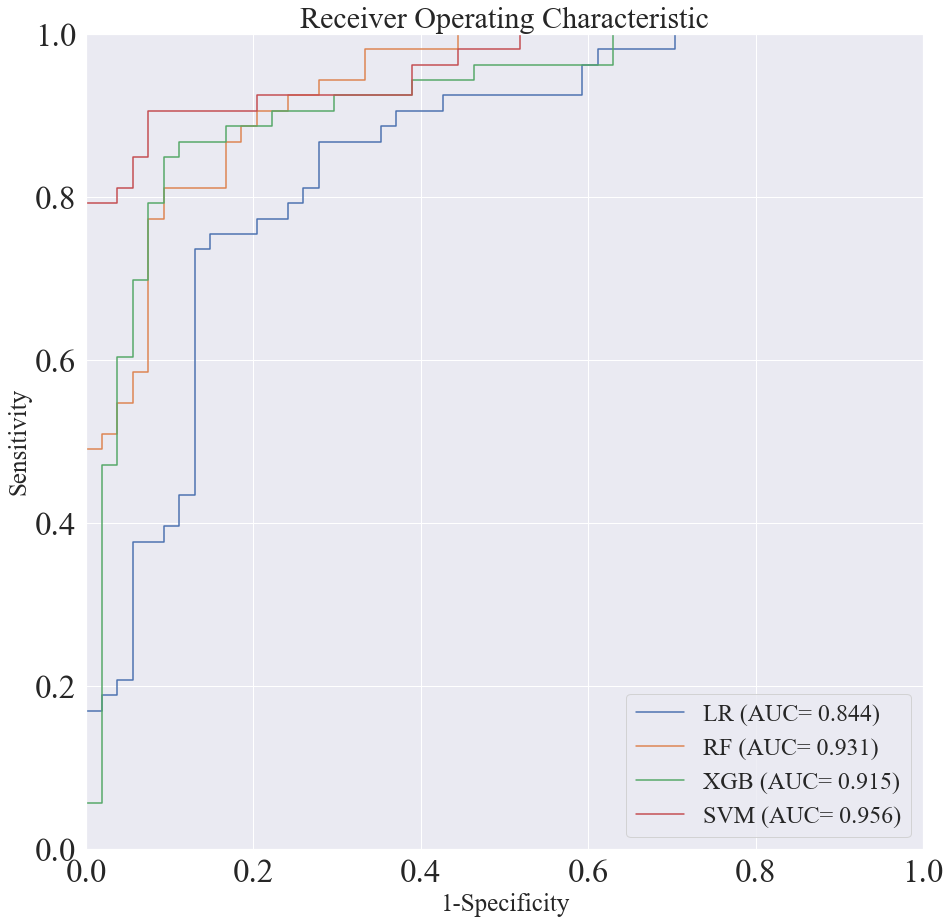

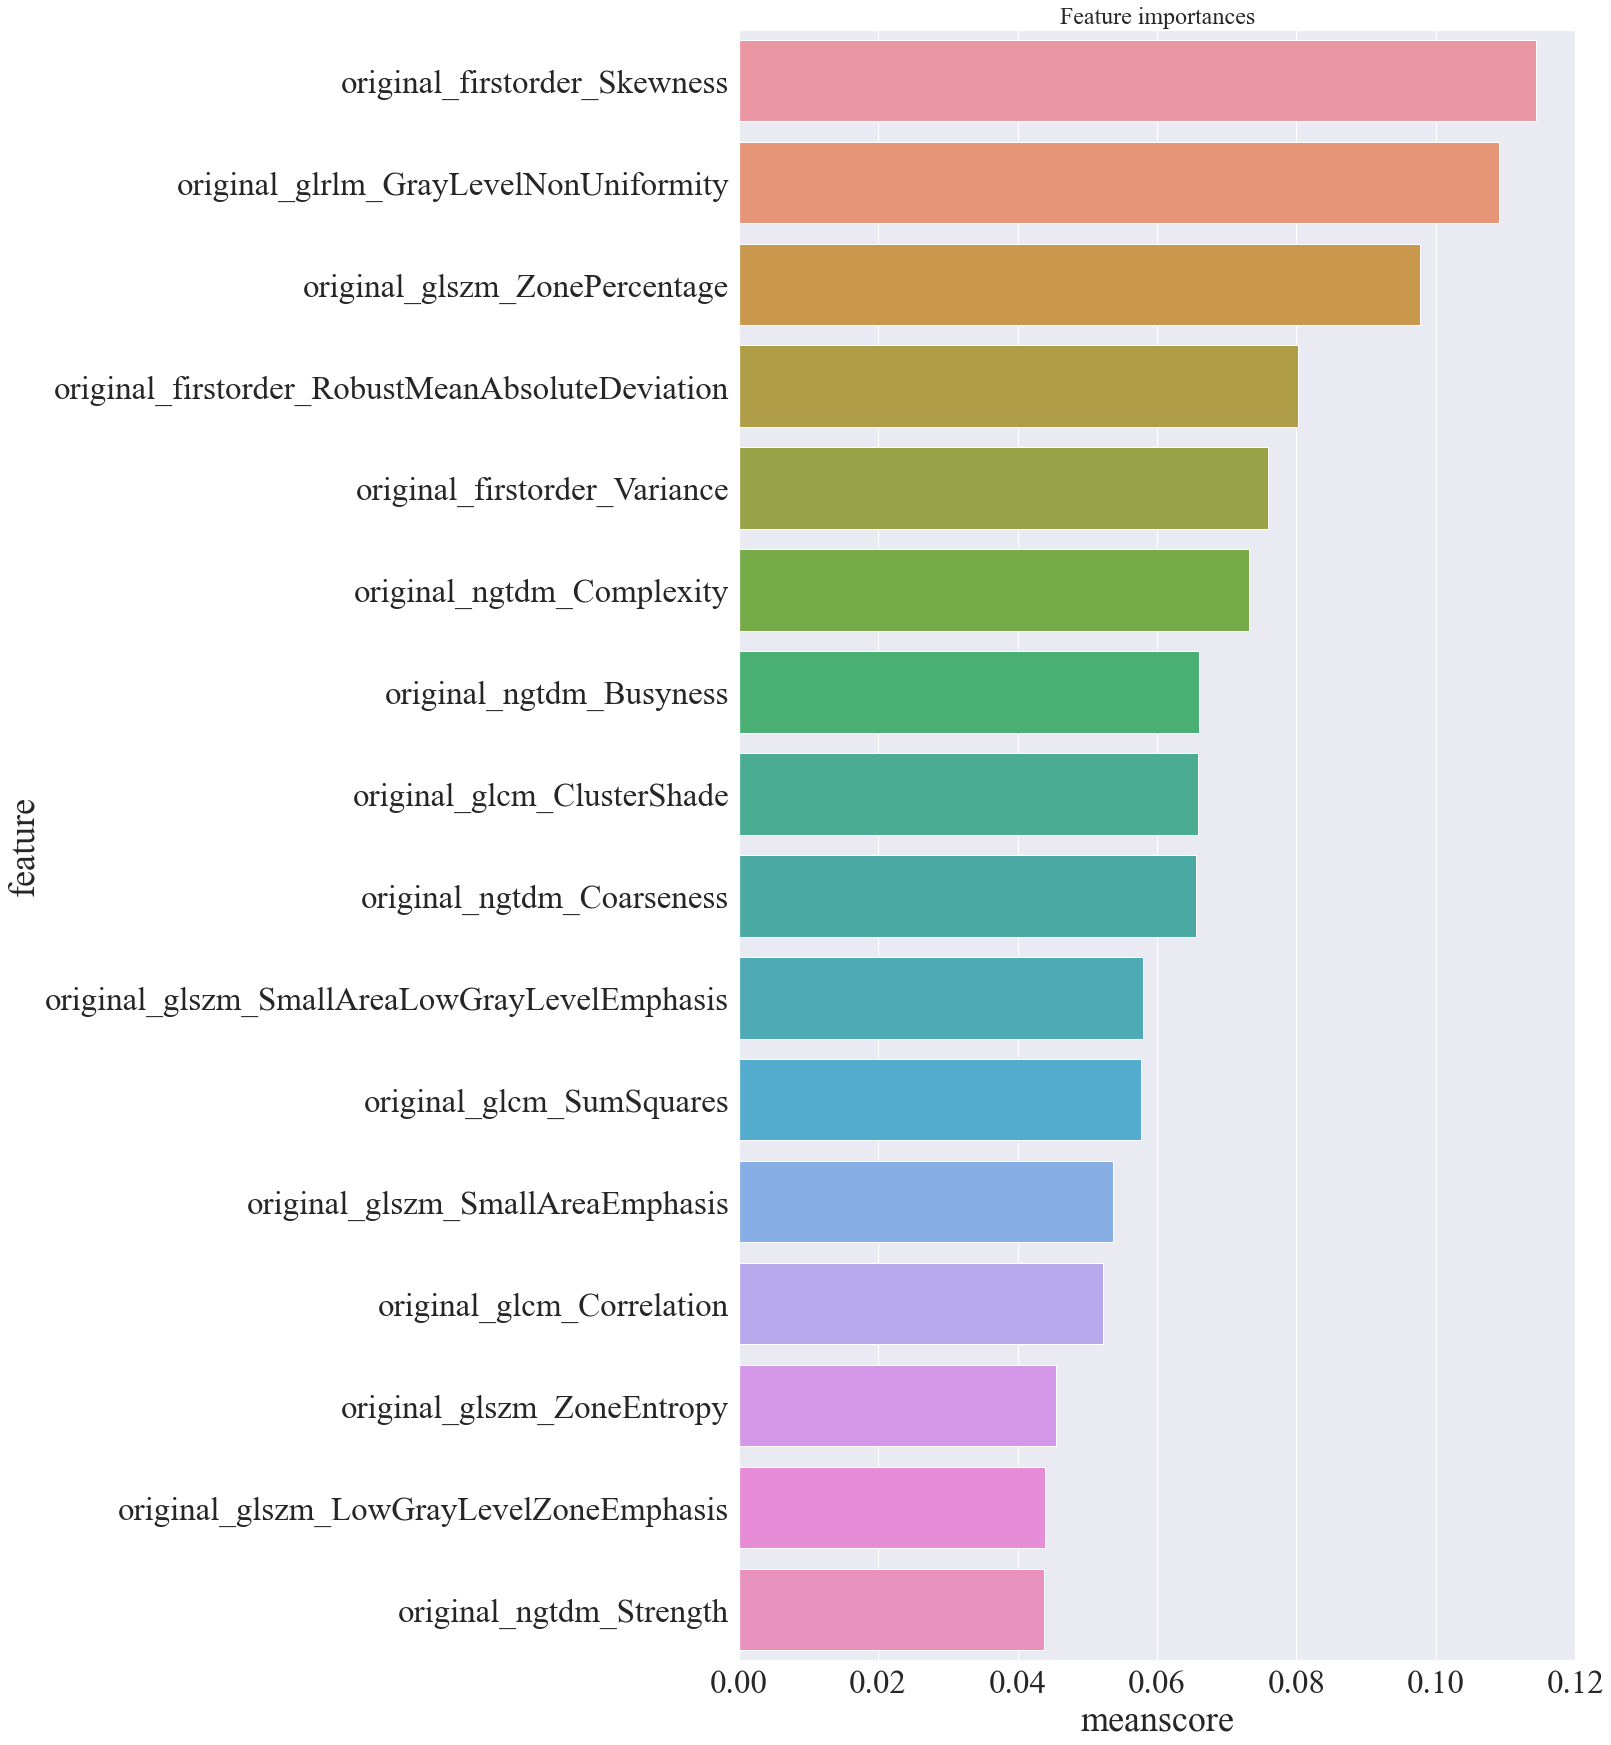

In [16]:
new_data_x = featurefind2(ftr_importances,data_x,data_y,classlist)
train_x,test_x,train_y,test_y = train_test_split(new_data_x,data_y,test_size=0.3,random_state = 25)
classlist = gridsearch(gridlist,classlist,train_x, train_y)
ftr_importances2 = create_curve(classlist,train_x,train_y,test_x,test_y)

In [25]:
def featurefind3(ftr_importances,data_x,data_y,classlist):
    best_score = 0
    for i in range(7):
        ftr_bot = ftr_importances.sort_values(ascending=True,by='meanscore')[:1]
        data_x = data_x.drop(ftr_bot.feature ,1)
        train_x,test_x,train_y,test_y = train_test_split(data_x,data_y,test_size=0.3,random_state = rand)
        #train_x, train_y = SMOTETomek(random_state=rand).fit_sample(train_x, train_y)
        meanscore,ftr_importances = roc_score(classlist,train_x,train_y,test_x,test_y)
        print(i)
    for i in range(len(data_x.columns)-1):
        ftr_bot = ftr_importances.sort_values(ascending=True,by='meanscore')[:1]
        data_x = data_x.drop(ftr_bot.feature ,1)
        train_x,test_x,train_y,test_y = train_test_split(data_x,data_y,test_size=0.3,random_state = rand)
        #train_x, train_y = SMOTETomek(random_state=rand).fit_sample(train_x, train_y)
        meanscore,ftr_importances = roc_score2(classlist,train_x,train_y,test_x,test_y)
        print(i)
        if meanscore>=best_score:
            best_score = meanscore
            best_bot = data_x
            print("best_score = ",best_score)
            print(best_bot.columns)
    return best_bot

In [26]:
def roc_score2(classlist,train_x,train_y,test_x,test_y):
    LR = classlist[0]
    RF = classlist[1]
    XGB = classlist[2]
    SVM = classlist[3]
    
    LR.fit(train_x,train_y)
    RF.fit(train_x,train_y)
    XGB.fit(train_x,train_y)
    SVM.fit(train_x,train_y)
    
    lr_proba = LR.predict_proba(test_x)[:,1]
    rf_proba = RF.predict_proba(test_x)[:,1]
    xgb_proba = XGB.predict_proba(test_x)[:,1]
    SVM_proba = SVM.decision_function(test_x)
    
    lr_score = roc_auc_score(test_y, lr_proba)
    rf_score = roc_auc_score(test_y, rf_proba)
    xgb_score = roc_auc_score(test_y, xgb_proba)
    SVM_score = roc_auc_score(test_y, SVM_proba)
    
    print(lr_score,rf_score,xgb_score,SVM_score)
    
    Importance = pd.DataFrame(train_x.columns,columns=['feature'])
    suf = ('_LR','_RF','_XGB','_SVM')
    
    for i in range(4):
        PI = P_Importance(classlist[i],test_x,test_y).loc[:,['feature','weight']]
        Importance = pd.merge(Importance,PI,on='feature',suffixes=(suf[i-1],suf[i]))
    
    Importance['meanscore'] = Importance.apply(lambda x: np.mean(x[1:5]),1)
    
    
    return np.mean([lr_score,rf_score,xgb_score,SVM_score]),Importance

D:\roadroad\envs\sungkyun\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.846261355695318 0.9189378057302586 0.8990216631726066 0.9615653389238294
0


D:\roadroad\envs\sungkyun\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8469601677148847 0.9102026554856744 0.9109014675052411 0.9647099930118799
1


D:\roadroad\envs\sungkyun\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.843466107617051 0.9168413696715584 0.919287211740042 0.9619147449336128
2
0.823549965059399 0.9322152341020266 0.9248777078965759 0.9510831586303284
3
0.8280922431865828 0.9116002795248078 0.926974143955276 0.9486373165618449
4
0.823549965059399 0.8812019566736549 0.9259259259259259 0.950733752620545
5
0.8204053109713487 0.9046121593291405 0.9290705800139762 0.9521313766596786
6
0.8106219426974144 0.8927323549965059 0.9371069182389937 0.950733752620545
0
best_score =  0.8977987421383647
Index(['original_firstorder_RobustMeanAbsoluteDeviation',
       'original_firstorder_Skewness', 'original_glcm_ClusterShade',
       'original_glcm_SumSquares', 'original_glrlm_GrayLevelNonUniformity',
       'original_glszm_ZonePercentage', 'original_ngtdm_Busyness',
       'original_ngtdm_Complexity'],
      dtype='object')
0.7410901467505241 0.8801537386443047 0.9276729559748428 0.976240391334731
1
0.742837176799441 0.8951781970649895 0.9266247379454927 0.9786862334032145
2
0.7435359888190076 0.89

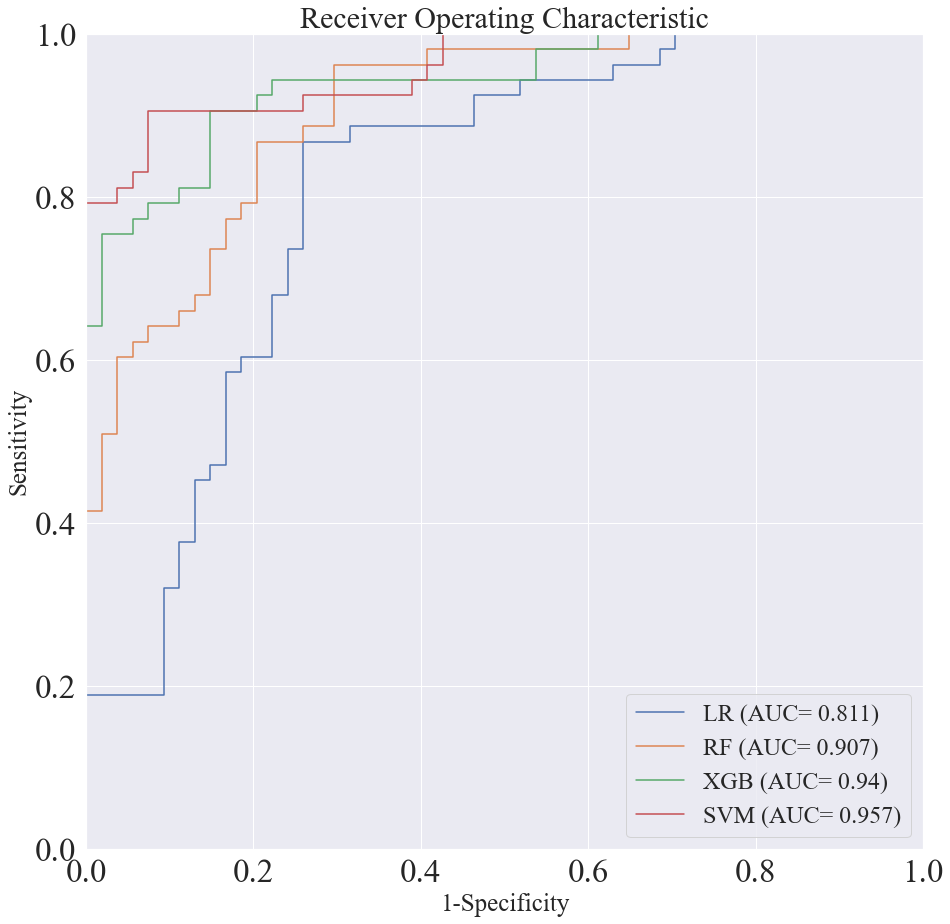

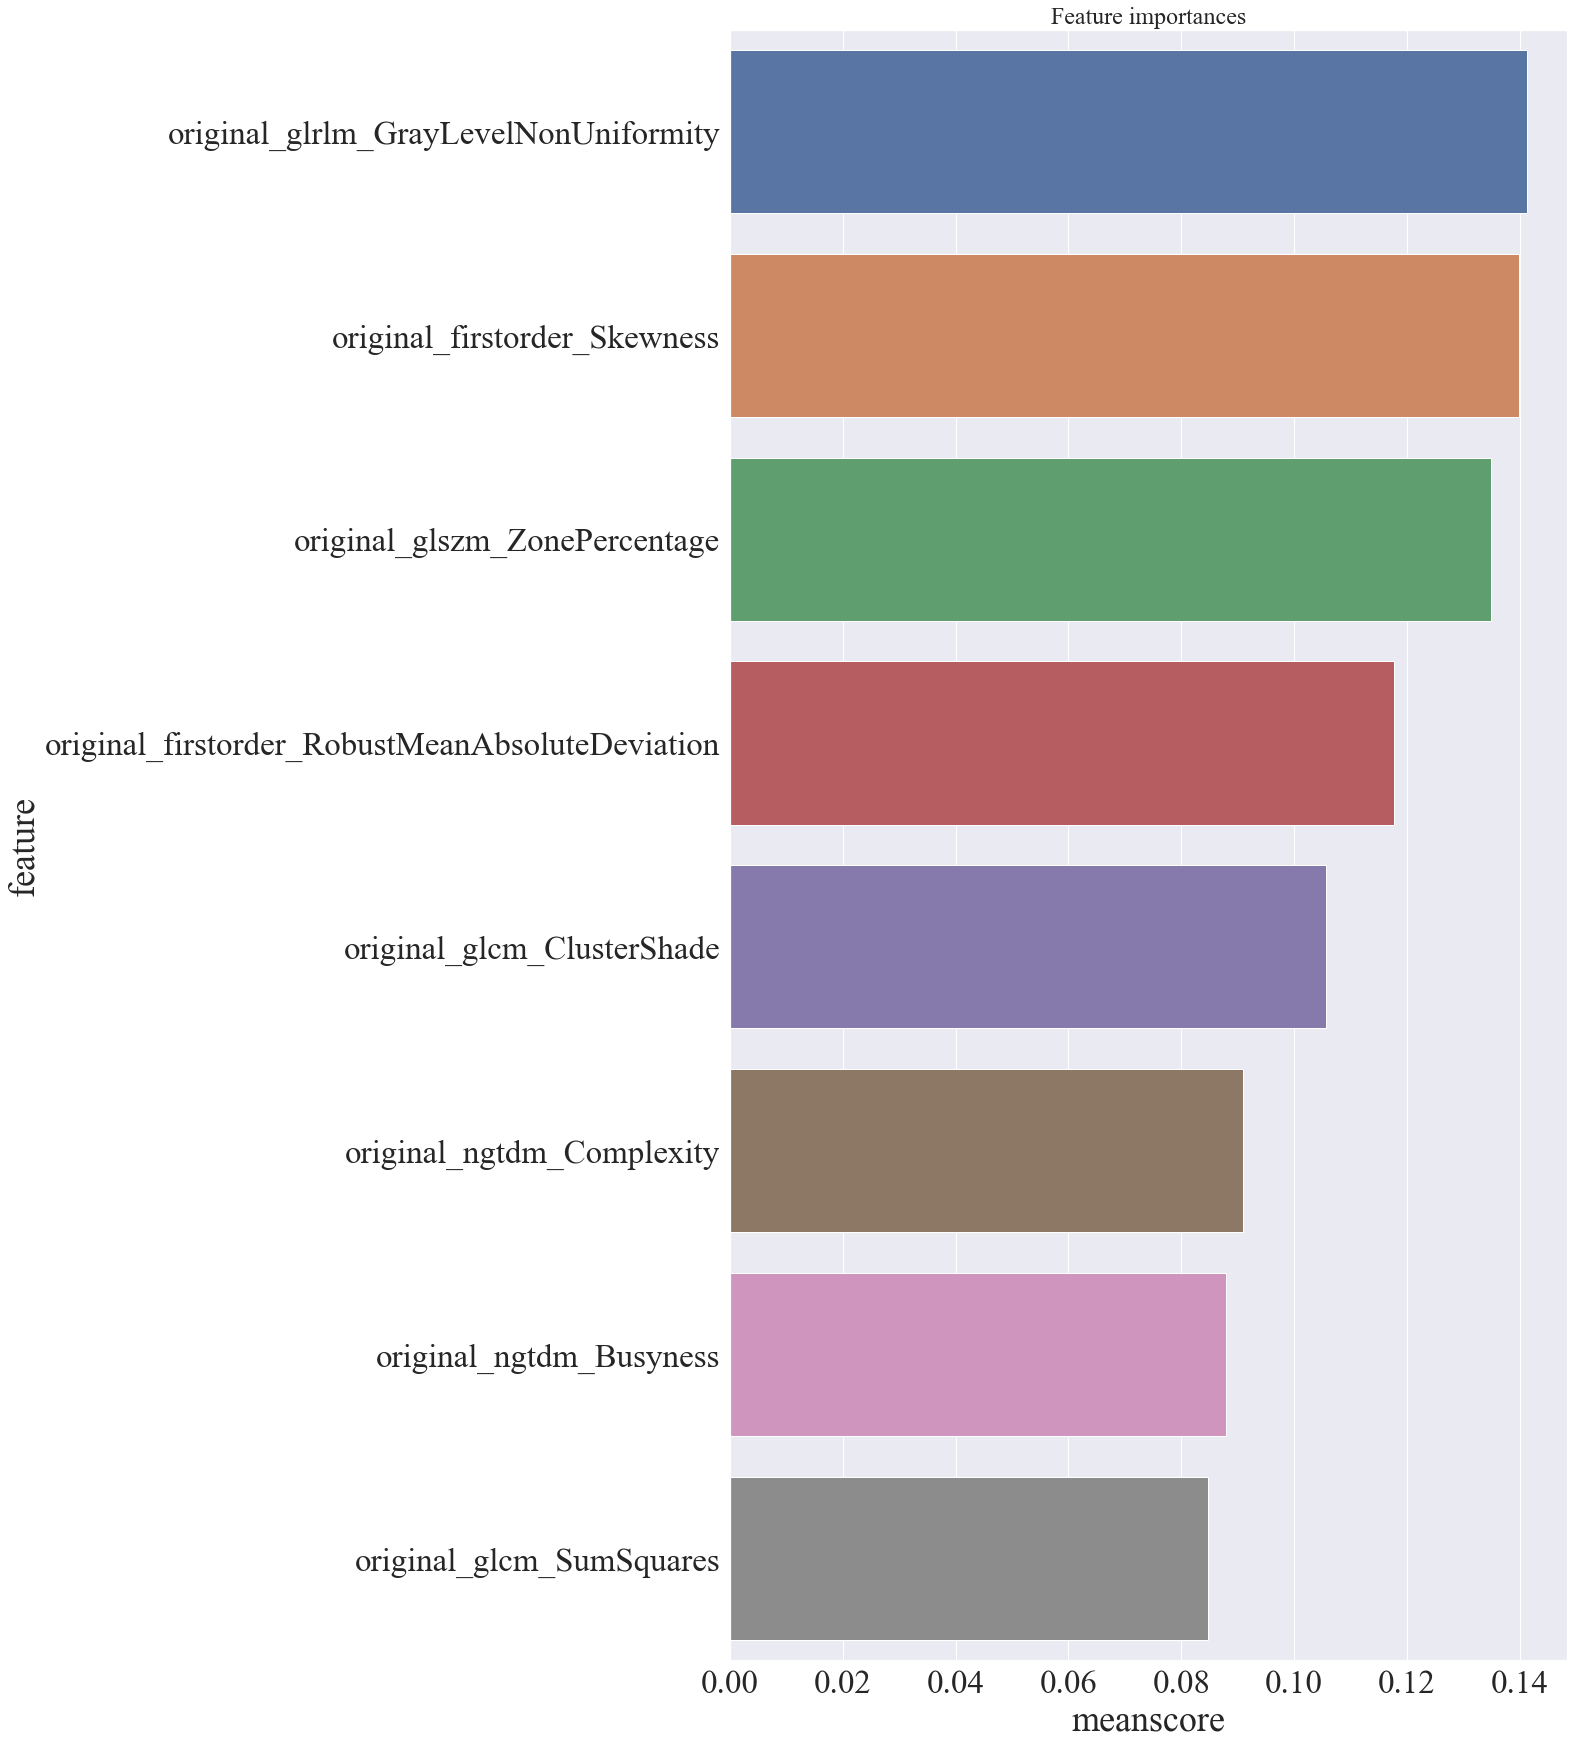

In [27]:
new_data_x1 = featurefind3(ftr_importances2,new_data_x,data_y,classlist)
train_x,test_x,train_y,test_y = train_test_split(new_data_x1,data_y,test_size=0.3,random_state = 25)
classlist = gridsearch(gridlist,classlist,train_x, train_y)
ftr_importances3 = create_curve(classlist,train_x,train_y,test_x,test_y)

In [33]:
ftr_importances3.
ftr_bot = ftr_importances3.sort_values(by=['meanscore'], axis=0, ascending=False)

ftr_bot.style.background_gradient(cmap='binary')

,feature,weight_LR,weight_RF,weight_XGB,weight_SVM,meanscore
4,original_glrlm_GrayLevelNonUniformity,0.325017,0.033892,0.056324,0.149895,0.141282
1,original_firstorder_Skewness,0.250384,0.037806,0.082949,0.188050,0.139797
5,original_glszm_ZonePercentage,0.269532,0.021174,0.052341,0.196296,0.134836
0,original_firstorder_RobustMeanAbsoluteDeviation,0.253249,0.011181,0.064361,0.141999,0.117697
2,original_glcm_ClusterShade,0.030678,0.104542,0.111111,0.176136,0.105617
7,original_ngtdm_Complexity,0.196855,0.008875,0.050105,0.107652,0.090872
6,original_ngtdm_Busyness,0.163103,0.014326,0.029350,0.145178,0.087989
3,original_glcm_SumSquares,0.095458,0.025297,0.013347,0.204647,0.084687


In [57]:
new_data_x1

,original_firstorder_RobustMeanAbsoluteDeviation,original_firstorder_Skewness,original_glcm_ClusterShade,original_glcm_SumSquares,original_glrlm_GrayLevelNonUniformity,original_glszm_ZonePercentage,original_ngtdm_Busyness,original_ngtdm_Complexity
0,0.172369,0.364395,0.423085,0.367836,-0.700537,-0.296030,-0.422118,-0.297992
1,0.165312,0.359011,0.421738,0.360579,-0.698321,-0.296449,-0.419832,-0.296147
2,0.169559,0.361733,0.423053,0.363461,-0.699212,-0.298514,-0.420805,-0.296736
3,0.177942,0.370055,0.428427,0.370027,-0.701149,-0.297772,-0.421574,-0.298202
4,0.176988,0.421150,0.493235,0.366845,-0.711646,-0.306773,-0.413142,-0.302762
...,...,...,...,...,...,...,...,...
351,-0.237263,-0.897416,-0.545038,-0.550091,-0.249754,0.213437,-0.635935,-0.133992
352,1.168347,1.162799,0.781562,1.028098,-1.045147,-0.472233,-1.051784,-0.578655
353,0.269850,-1.140057,-2.075791,0.923682,-0.073499,-0.035003,-0.324771,-0.304443
354,0.089737,0.443381,0.094723,0.147919,-0.868889,-1.110223,-0.856701,-0.819499


In [68]:
train_x

,original_firstorder_RobustMeanAbsoluteDeviation,original_firstorder_Skewness,original_glcm_ClusterShade,original_glcm_SumSquares,original_glrlm_GrayLevelNonUniformity,original_glszm_ZonePercentage,original_ngtdm_Busyness,original_ngtdm_Complexity
134,-0.950810,-2.552260,-2.700630,-0.080783,0.368845,0.230707,-0.174833,-0.098681
124,-0.412726,-0.698909,-0.206522,-0.533884,0.554795,0.559746,0.783453,0.284236
123,-0.401686,-0.665855,-0.175209,-0.533581,0.546820,0.558886,0.786371,0.283437
78,0.903849,0.174713,-0.350476,1.286933,-0.524871,-0.167685,-0.246041,-0.374760
307,-1.082396,0.346469,1.183654,-1.548631,0.091437,0.414136,0.565620,0.267379
...,...,...,...,...,...,...,...,...
255,0.771208,0.193504,-0.031560,0.706390,-0.035551,0.395951,0.306633,-0.109683
317,-1.541639,-1.735038,-0.866804,-1.054988,2.727245,2.581760,2.246463,2.676291
143,-0.547771,-1.511288,-1.796470,0.007526,-1.048402,-1.312319,-1.647718,-1.009389
318,-1.514116,-1.665180,-0.825825,-1.043032,2.680802,2.570961,2.223681,2.656348


====================== Start of Level 0 ======================
Input Dimensionality 8 at Level 0 
4 models included in Level 0 
Fold 1/5 , model 0 , auc===0.804800 
Fold 1/5 , model 1 , auc===0.944000 
Fold 1/5 , model 2 , auc===0.971200 
Fold 1/5 , model 3 , auc===0.660000 
=========== end of fold 1 in level 0 ===========
Fold 2/5 , model 0 , auc===0.733990 
Fold 2/5 , model 1 , auc===0.933498 
Fold 2/5 , model 2 , auc===0.916256 
Fold 2/5 , model 3 , auc===0.543514 
=========== end of fold 2 in level 0 ===========
Fold 3/5 , model 0 , auc===0.759615 
Fold 3/5 , model 1 , auc===0.955128 
Fold 3/5 , model 2 , auc===0.963141 
Fold 3/5 , model 3 , auc===0.631410 
=========== end of fold 3 in level 0 ===========
Fold 4/5 , model 0 , auc===0.827922 
Fold 4/5 , model 1 , auc===0.949675 
Fold 4/5 , model 2 , auc===0.902597 
Fold 4/5 , model 3 , auc===0.673701 
=========== end of fold 4 in level 0 ===========
Fold 5/5 , model 0 , auc===0.775920 
Fold 5/5 , model 1 , auc===0.965719 
Fold 5/5 ,

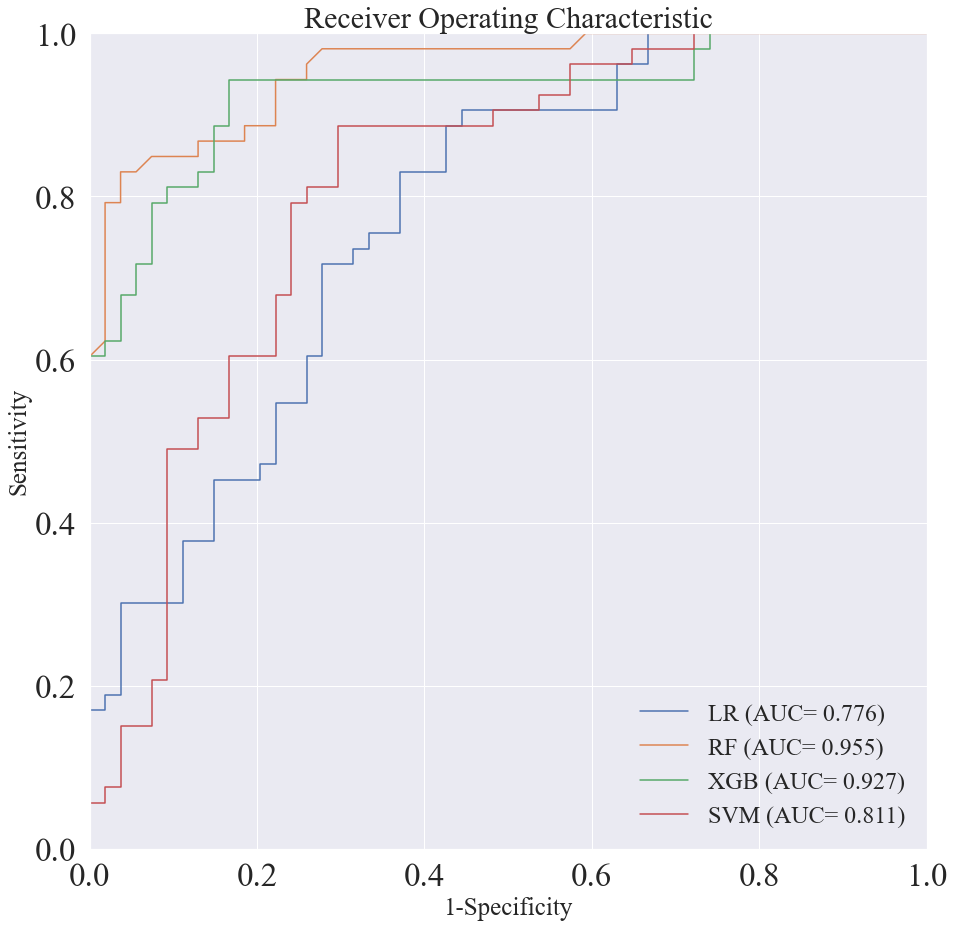

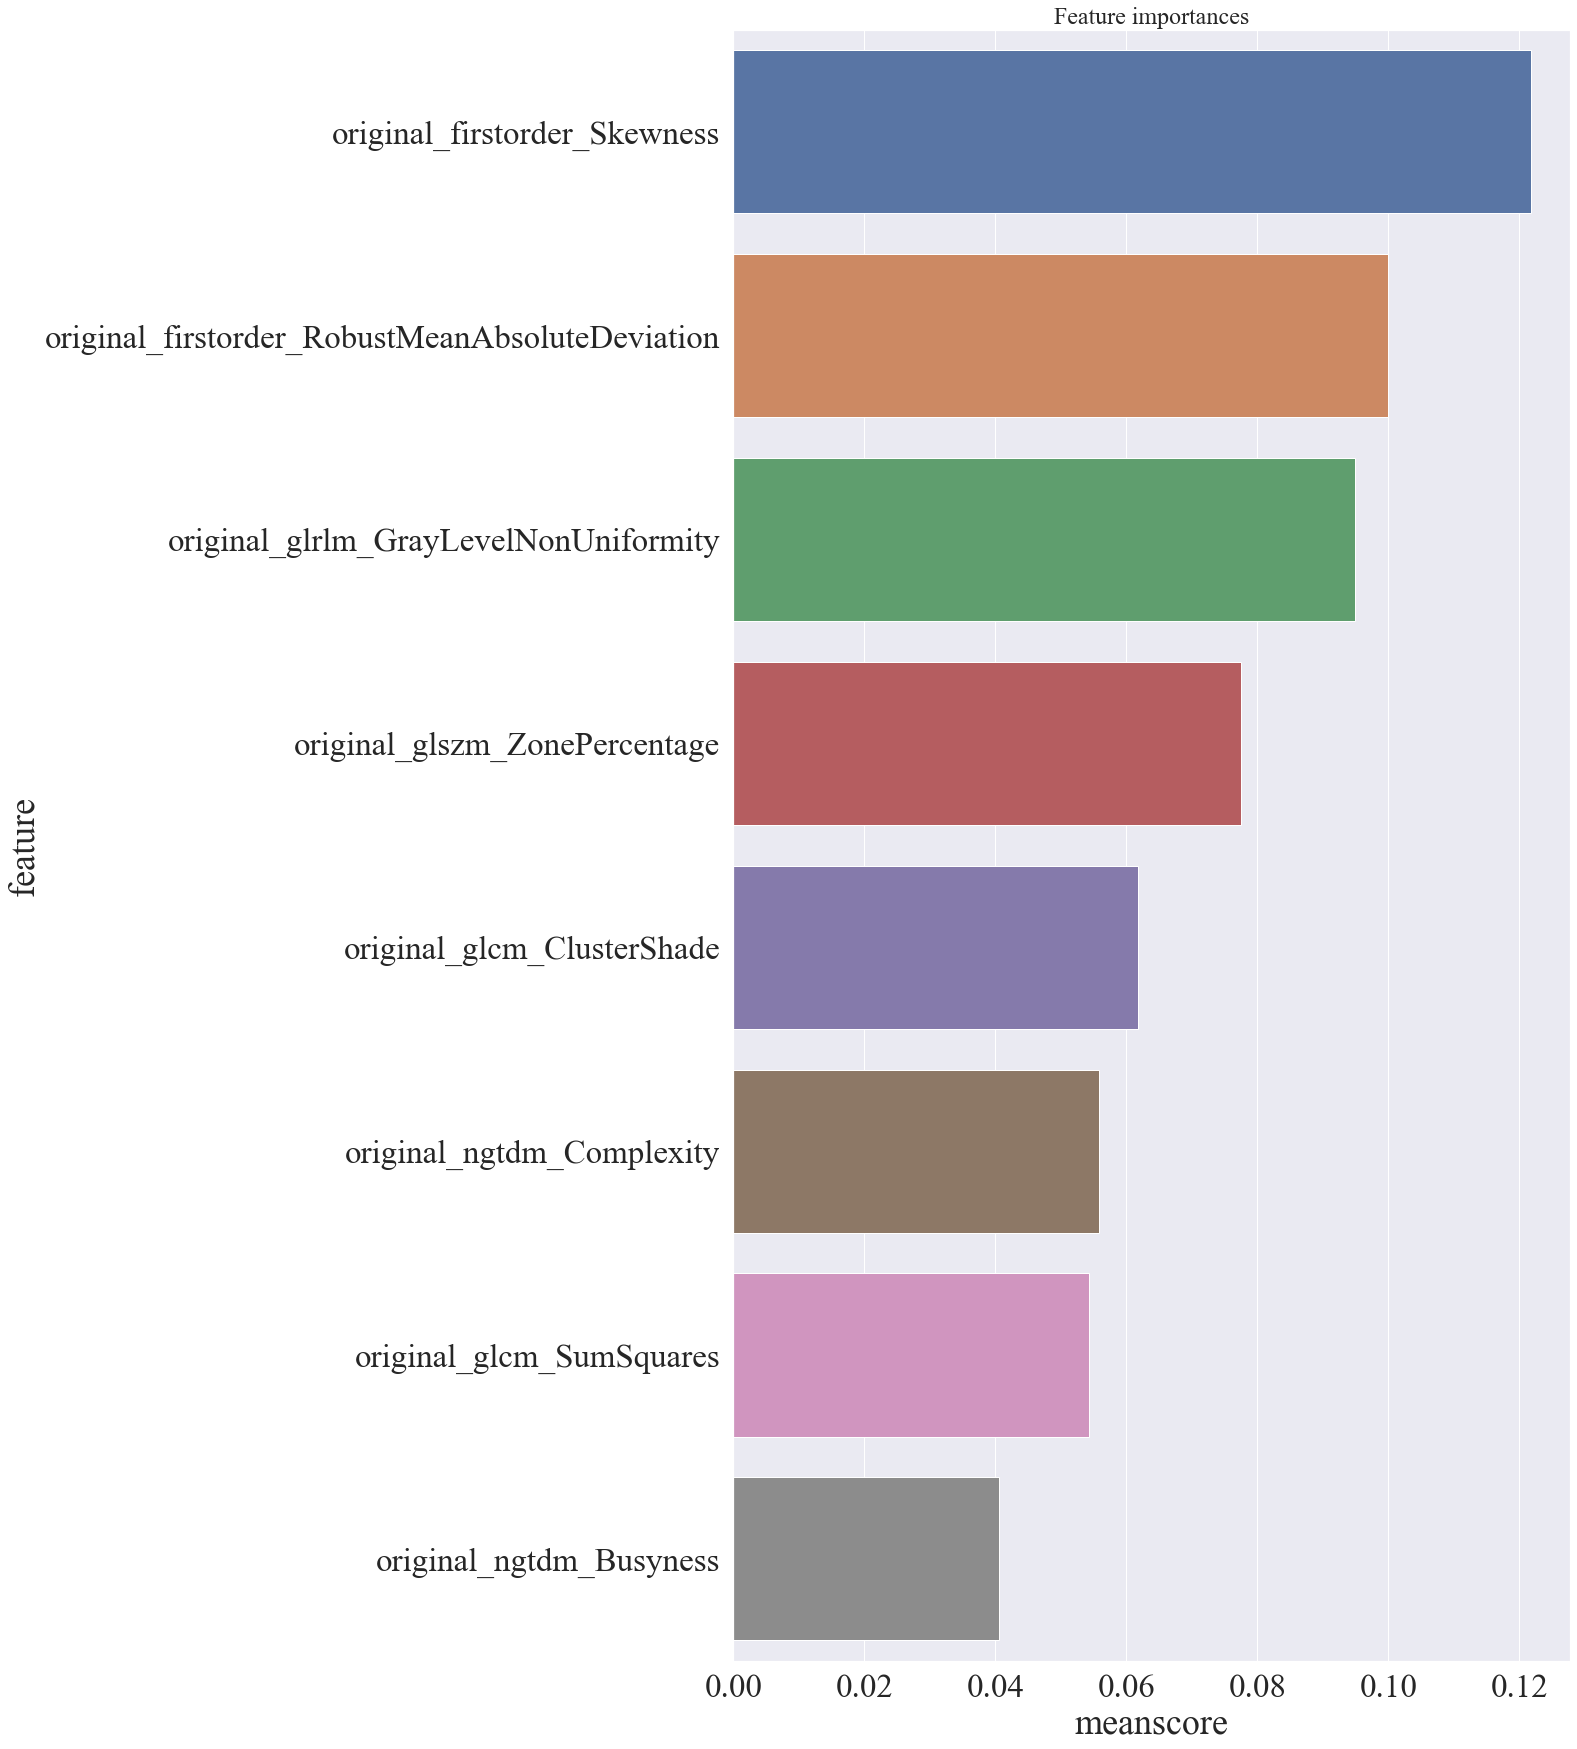

In [84]:
ftr_importances3 = create_curve(classlist,train_x,train_y,test_x,test_y)

In [79]:
type(test_y)

pandas.core.series.Series

In [82]:
test_y.to_csv("data.csv")